# Imports

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

from tp_models import pnp_pgd_denoising, red_denoising, crr_nn_denoising

%load_ext autoreload
%autoreload 2

/home/mml/Documents/GMI/.pixi/envs/default/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Setup

In [14]:
!wget https://perso.telecom-paristech.fr/aleclaire/mva/tp9.zip
!unzip tp9.zip
!rm -r im
!rm tp9.zip

--2025-03-21 18:31:31--  https://perso.telecom-paristech.fr/aleclaire/mva/tp9.zip
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving perso.telecom-paristech.fr (perso.telecom-paristech.fr)... 2a04:8ec0:0:a::89c2:16e3, 137.194.22.227
Connecting to perso.telecom-paristech.fr (perso.telecom-paristech.fr)|2a04:8ec0:0:a::89c2:16e3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 501814458 (479M) [application/zip]
Saving to: ‘tp9.zip’

tp9.zip             100%[===================>] 478.57M  87.5MB/s    in 5.3s    

2025-03-21 18:31:37 (90.3 MB/s) - ‘tp9.zip’ saved [501814458/501814458]

Archive:  tp9.zip
replace ckpts/drunet_color.pth? [y]es, [n]o, [A]ll, [N]one, [r]ename: rm: cannot remove 'im': No such file or directory


# Experiments

## PNP-PGD

[   0/ 100] [0.00000 s] PSNR = 18.41
[  10/ 100] [0.26102 s] PSNR = 25.02
[  20/ 100] [0.40013 s] PSNR = 26.78
[  30/ 100] [0.53564 s] PSNR = 27.83
[  40/ 100] [0.67031 s] PSNR = 28.60
[  50/ 100] [0.80527 s] PSNR = 29.19
[  60/ 100] [0.94047 s] PSNR = 29.65
[  70/ 100] [1.07657 s] PSNR = 30.01
[  80/ 100] [1.21205 s] PSNR = 30.29


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0026727244..1.0121263].


[  90/ 100] [1.34684 s] PSNR = 30.53
[ 100/ 100] [1.48217 s] PSNR = 30.70


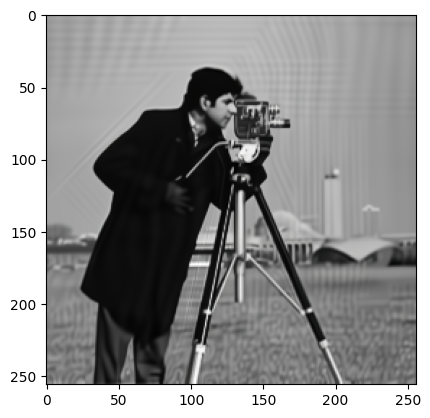

In [2]:
x, psnr = pnp_pgd_denoising("images/photographer.png", niter=100)
plt.imshow(x)

## RED-PGD

[   0/ 100] [0.00000 s] PSNR = 18.41
[  10/ 100] [0.32292 s] PSNR = 23.90
[  20/ 100] [0.60566 s] PSNR = 25.82
[  30/ 100] [0.88892 s] PSNR = 26.88
[  40/ 100] [1.17238 s] PSNR = 27.58
[  50/ 100] [1.45545 s] PSNR = 28.05
[  60/ 100] [1.73903 s] PSNR = 28.39
[  70/ 100] [2.02224 s] PSNR = 28.63
[  80/ 100] [2.30491 s] PSNR = 28.79
[  90/ 100] [2.58845 s] PSNR = 28.90


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.11297464..1.0386147].


[ 100/ 100] [2.87318 s] PSNR = 28.96


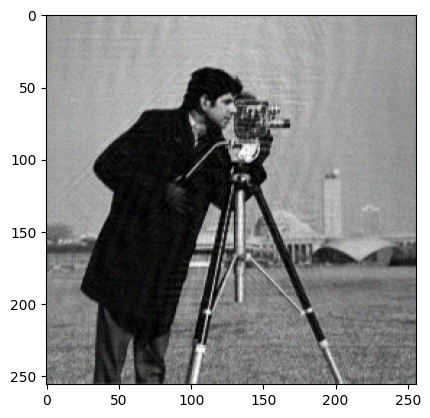

In [3]:
x, psnr = red_denoising("images/photographer.png", niter=100)
plt.imshow(x)

## CRR-NN

--- loading checkpoint from epoch 10 ---
---------------------
Building a CRR-NN model with 
 - [1, 8, 32] channels 
 splines parameters:
  (LinearSpline(mode=conv, num_activations=32, init=zero, size=21, grid=0.010, monotonic_constraint=True.))
---------------------
---------------------
 PRUNNING 
 Found 23 filters with non-vanishing potential functions
---------------------
 Number of parameters after prunning: 4373


psnr: 30.08 | ssim: 0.8858 | res: 1.10e-02:   0%|          | 0/100 [00:00<?, ?it/s]

psnr: 37.70 | ssim: 0.9575 | res: 4.35e-05: 100%|██████████| 100/100 [00:00<00:00, 224.78it/s]


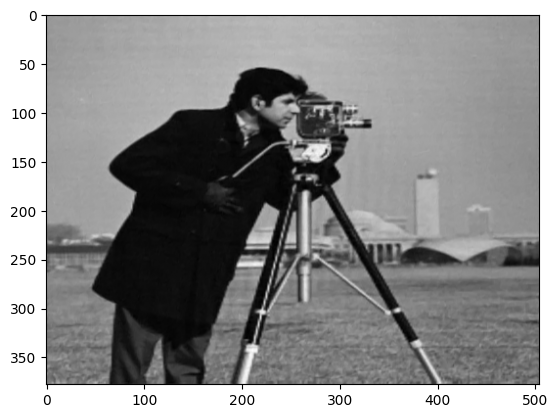

In [40]:
x, psnr = crr_nn_denoising("images/photographer.png", niter=100, lmbd=0.11, mu=10)
plt.imshow(x.numpy(), cmap="gray")